## Importing important libraries and reading the training and testing data

In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
train_df = pd.read_csv("train_df.csv")
test_df = pd.read_csv("test_df.csv")

## Preprocessing training data

### Checking for null values, invalid target values and duplicated rows

In [2]:
train_df = train_df.head(9000)

In [3]:
train_df.describe()

,target
count,9000.000000
mean,0.061333
std,0.239954
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [4]:
train_df.isna().sum()

qid              0
question_text    0
target           0
dtype: int64

In [5]:
train_df["target"].unique()

array([0, 1])

In [6]:
train_df.index[train_df.duplicated()]

Int64Index([], dtype='int64')

## Preprocessing testing data

### Checking for null values and duplicated rows

In [7]:
test_df

,qid,question_text
0,a4f3da3a3df9dd881edd,My period is due on my wedding day. How can I ...
1,9914c62ed3f69684d549,How many numbers higher than a million can be ...
2,8138ae48649e37091a91,"How come I feel nothing for my family, but sti..."
3,981b4753d17ef14d09f7,"In case of collapse of the Democratic party, w..."
4,452e2c705276ba16b7b7,Who is Émile Naoumoff?
...,...,...
306117,a352dff4fcc2571815ce,Did anyone get an update on Maruti Suzuki All ...
306118,ad4a8498d97c536c67b9,What 5 people in history do you find the most ...
306119,19784a27b55d4b453fda,How can I remove the tan on my forehead?
306120,370191dba26465997879,"If you are a well known hacker, will you be mo..."


In [8]:
test_df.isna().sum()

qid              0
question_text    0
dtype: int64

In [9]:
test_df.index[test_df.duplicated()]

Int64Index([], dtype='int64')

## Cleaning the text
When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate. Here are a bunch of things you can do to clean your data. We're going to execute just the common cleaning steps here and the rest can be done at a later point to improve our results.

Common data cleaning steps on all text:

Make text all lower case
Remove punctuation
Remove numerical values
Remove common non-sensical text (/n)
Tokenize text
Remove stop words
More data cleaning steps after tokenization:

Stemming / lemmatization
Parts of speech tagging
Create bi-grams or tri-grams
Deal with typos
And more...

### Here (in round 1) we are doing the following things:-
1. Making the text lower case.
2. Removing text in square brackets
3. Removing punctuation marks from the text
4. Removing words containing numbers.

In [10]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [11]:
train_df.question_text= train_df.question_text.apply(round1)
train_df.question_text

0       what are interesting facts about microsoft his...
1       what are those things which are not gonna happ...
2       what should i know to avoid being upsold when ...
3                 how i add any account with payment bank
4       which multi level marketing products are actua...
                              ...                        
8995    how do you know if police is looking for you w...
8996    who is the man whose face is a part of the ala...
8997    which is better  rajalakshmi engineering colle...
8998                          where can i start investing
8999                         what can make everyone happy
Name: question_text, Length: 9000, dtype: object

### Here (in round2) we are doing:-
1. Getting rid of additional punctuation
2. Removing some non-sensical text
3. Removing urls
4. 

In [12]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(re.compile('<.*?>') , '', text)

    return text
round2 = lambda x: clean_text_round2(x)

In [13]:
train_df.question_text= train_df.question_text.apply(round2)
train_df.question_text

0       what are interesting facts about microsoft his...
1       what are those things which are not gonna happ...
2       what should i know to avoid being upsold when ...
3                 how i add any account with payment bank
4       which multi level marketing products are actua...
                              ...                        
8995    how do you know if police is looking for you w...
8996    who is the man whose face is a part of the ala...
8997    which is better  rajalakshmi engineering colle...
8998                          where can i start investing
8999                         what can make everyone happy
Name: question_text, Length: 9000, dtype: object

In [14]:
train_df.question_text

0       what are interesting facts about microsoft his...
1       what are those things which are not gonna happ...
2       what should i know to avoid being upsold when ...
3                 how i add any account with payment bank
4       which multi level marketing products are actua...
                              ...                        
8995    how do you know if police is looking for you w...
8996    who is the man whose face is a part of the ala...
8997    which is better  rajalakshmi engineering colle...
8998                          where can i start investing
8999                         what can make everyone happy
Name: question_text, Length: 9000, dtype: object

### Tokenization
Tokenization is the process of segmenting running text into sentences and words. In essence, it’s the task of cutting a text into pieces called tokens. 
$\newline$ Here we are going to use word tokenizer i.e. the words are the tokens

In [15]:
# Tokenization
#defining function for tokenization
# import re
# def tokenization(text):
#     tokens = re.split('W+',text)
#     return tokens[0].split(" ")
# #applying function to the column
# train_df['question_text']= train_df['question_text'].apply(lambda x: tokenization(x))
# train_df.iloc[1].question_text
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize,word_tokenize
def tokenization(text):
    return word_tokenize(text)
# applying function to the column
train_df['question_text']= train_df['question_text'].apply(lambda x: tokenization(x))
# train_df.iloc[1].question_text

[nltk_data] Downloading package punkt to
[nltk_data]     /home/karanjitsaha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Stop Words removal
Stop words are commonly occurring words that for some computational processes provide little information or in some cases introduce unnecessary noise and therefore need to be removed.

In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# train_df.question_text = [word for word in train_df.question_text if not word in stopwords.words('english')]
# train_df
# print(stopwords.words('english'))
stopwords=stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
train_df['question_text']= train_df['question_text'].apply(lambda x:remove_stopwords(x))
train_df

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/karanjitsaha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,qid,question_text,target
0,dda0b0efc8ba86e81ec4,"[interesting, facts, microsoft, history]",0
1,dc708b74a108d0fc0ad9,"[things, gon, na, happen, ever]",0
2,06a27ec5d82dacd8bfe0,"[know, avoid, upsold, getting, car, brakes, ch...",0
3,00cbb6b17e3ceb7c5358,"[add, account, payment, bank]",0
4,7c304888973a701585a0,"[multi, level, marketing, products, actually, ...",0
...,...,...,...
8995,b4dc69ef2ceabc058b55,"[know, police, looking, dont, live, home, phon...",0
8996,8b24d77d15b6655edbef,"[man, whose, face, part, alaskan, airlines, li...",0
8997,77dffb491d251bf79672,"[better, rajalakshmi, engineering, college, ra...",0
8998,1ae8e568abe4cc284bb8,"[start, investing]",0


In [17]:
# import nltk
# from nltk.stem import PorterStemmer
# ps = PorterStemmer()

In [18]:
# train_df['question_text'] = train_df['question_text'].apply(lambda x: [ps.stem(y) for y in x]) # Stem every word.
# # train_df = train_df.drop(columns=['question_text']) # Get rid of the unstemmed column.

In [19]:
train_df

,qid,question_text,target
0,dda0b0efc8ba86e81ec4,"[interesting, facts, microsoft, history]",0
1,dc708b74a108d0fc0ad9,"[things, gon, na, happen, ever]",0
2,06a27ec5d82dacd8bfe0,"[know, avoid, upsold, getting, car, brakes, ch...",0
3,00cbb6b17e3ceb7c5358,"[add, account, payment, bank]",0
4,7c304888973a701585a0,"[multi, level, marketing, products, actually, ...",0
...,...,...,...
8995,b4dc69ef2ceabc058b55,"[know, police, looking, dont, live, home, phon...",0
8996,8b24d77d15b6655edbef,"[man, whose, face, part, alaskan, airlines, li...",0
8997,77dffb491d251bf79672,"[better, rajalakshmi, engineering, college, ra...",0
8998,1ae8e568abe4cc284bb8,"[start, investing]",0


### Lemmatization
Lemmatization is a tool that performs full morphological analysis to more accurately find the root, or “lemma” for a word.

In [20]:
import nltk
nltk.download('omw-1.4')
# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
train_df['question_text']=train_df['question_text'].apply(lambda x:lemmatizer(x))
train_df.shape

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/karanjitsaha/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/karanjitsaha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(9000, 3)

In [21]:
# # We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer(stop_words='english')
# words=[]
# for i in range(train_df.question_text.shape[0]):
#     words.extend(word for word in train_df.question_text[:][i])
# # print(words)
# data_cv = cv.fit_transform(word for word in words)
# # data_cv = train_df.question_text 
# data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
# # data_dtm.index = train_df.index
# data_dtm
# # print(len(words))
# # print(data_dtm.shape)
# # print(cv.get_feature_names_out())

## Applying Multinomial Naive Bayes to the model

In [22]:
def makeSentence(text):
    return ' '.join(list(text))

train_df.question_text = train_df['question_text'].apply(lambda x: makeSentence(x))

print(train_df.question_text[0])
# print(makeSentence(train_df.question_text[0]))
# ' '.join(list(train_df.question_text)[0])

interesting fact microsoft history


In [23]:
from sklearn.naive_bayes import MultinomialNB
# Import modules for evaluation purposes
# Import libraries for predcton
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc,f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf = TfidfVectorizer(decode_error='ignore', lowercase = True, min_df=2)
# Numericalize the train dataset
train = tfidf.fit_transform(train_df.question_text.values.astype('U'))
# Numericalize the test dataset
test = tfidf.transform(test_df.question_text.values.astype('U'))

model = MultinomialNB()
model.fit(train, train_df.target)
print("train score:", model.score(train, train_df.target))
# print("test score:", model.score(test, test_df.target))

train score: 0.9396666666666667


In [24]:
import matplotlib.pyplot as plt
import seaborn as sn

# Create the confussion matrix
def plot_confussion_matrix(y_test, y_pred):
    ''' Plot the confussion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)

    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()

# ROC Curve
# plot no skill
# Calculate the points in the ROC curve
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

              precision    recall  f1-score   support

           0    0.93961   1.00000   0.96886      8448
           1    1.00000   0.01630   0.03209       552

    accuracy                        0.93967      9000
   macro avg    0.96980   0.50815   0.50047      9000
weighted avg    0.94331   0.93967   0.91141      9000



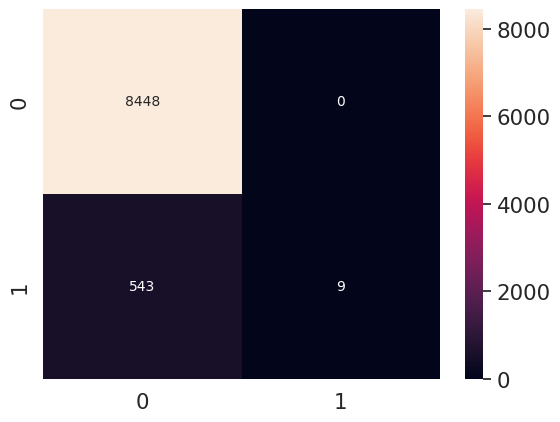

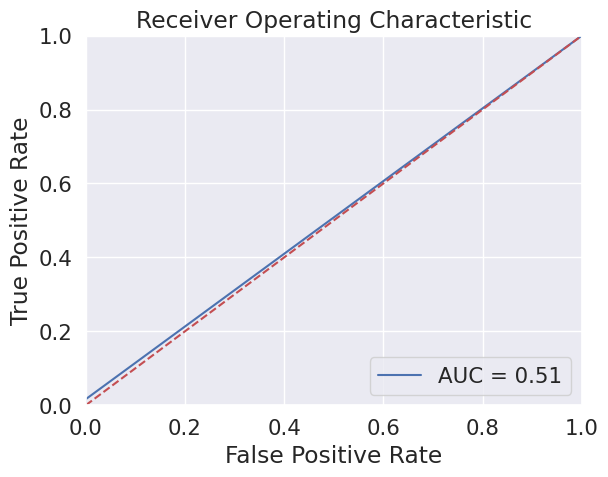

In [25]:
# Predicting the Test set results
y_pred = model.predict(train)

print(metrics.classification_report(train_df.target, y_pred,  digits=5))
plot_confussion_matrix(train_df.target, y_pred)
plot_roc_curve(train_df.target, y_pred)

## Applying SVM classifier to our dataset

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameters to tune
parameters = { 
    'C': [1.0, 10],
    'gamma': [1, 'auto', 'scale']
}
# Tune yyperparameters  using Grid Search and a SVM model
model = GridSearchCV(SVC(kernel='rbf'), parameters, cv=5, n_jobs=-1).fit(train, train_df.target)
print("train score:", model.score(train, train_df.target))

train score: 0.9997777777777778


              precision    recall  f1-score   support

           0    0.99976   1.00000   0.99988      8448
           1    1.00000   0.99638   0.99819       552

    accuracy                        0.99978      9000
   macro avg    0.99988   0.99819   0.99903      9000
weighted avg    0.99978   0.99978   0.99978      9000



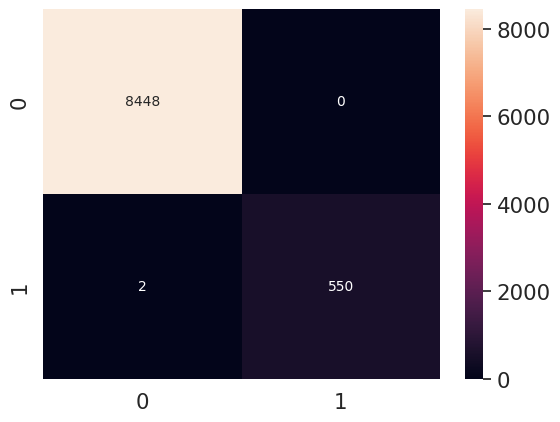

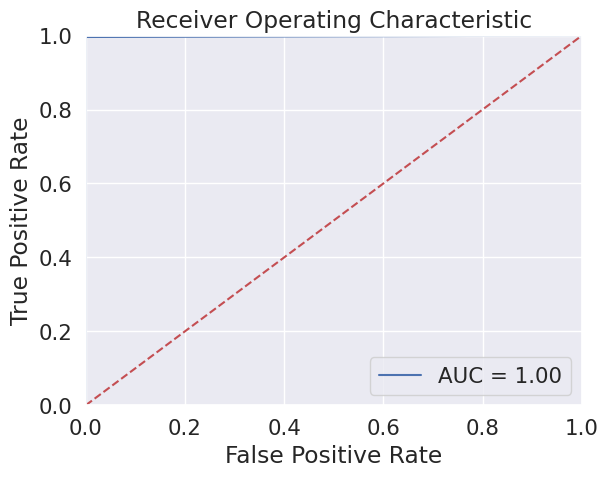

In [27]:
# Predicting the Test set results
y_pred = model.predict(train)

print(metrics.classification_report(train_df.target, y_pred,  digits=5))
plot_confussion_matrix(train_df.target, y_pred)
plot_roc_curve(train_df.target, y_pred)

## Applying XG Boost classifier to our dataset